# Project 1 Briefing
**Scenario**: We are data analysts hired by the management of a UK-based online retail store. They have provided us with a large dataset of their transactions.

High-Level Goal: The management's request is broad:**"We want to understand our sales performance and customer behavior to find ways to increase profitability."**

Our Mission: Our job is to turn that vague goal into specific, answerable questions and use the data to answer them. This process is the heart of Exploratory Data Analysis (EDA).

**Our Project Goal:**
Our main goal for this project is to perform an Exploratory Data Analysis (EDA) to understand the sales performance and typical customer purchasing behavior for this online retail store.

To achieve this, we want to answer specific business questions like:

1. How is our business performing on a monthly basis? (Sales Trends)
2. Which countries are our top markets?
3. What are our best-selling products?

**Method**
1.  Loading and inspecting the Data
2.  Data Cleaning
3.  Exploratory Data Analysis (EDA)

In [1]:
#Import Pandas, Numpy, matplotlib and seaborn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

#Set prcision to 2
pd.set_option('display.float_format', '{:.2f}'.format)
pd.set_option('display.precision', 2)

## Step 1: Loading and inspecting the Data
**Goal:** perform a quick inspection to ensure it loaded correctly.

a. Load the data 

b. check how many rows and column we have

c. Check how many nulls and missing values and data types of the columns 


### a. Load the data

In [2]:
df = pd.read_csv(r'C:\Users\63927\Documents\Jupyter_lab_notebook_files\UK-retail-sales-analytics\data\online_retail_II.csv')
df.head(10) # Shows only first 10 rows 

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.00,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.00,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.00,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.00,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.00,United Kingdom
5,489434,22064,PINK DOUGHNUT TRINKET POT,24,2009-12-01 07:45:00,1.65,13085.00,United Kingdom
6,489434,21871,SAVE THE PLANET MUG,24,2009-12-01 07:45:00,1.25,13085.00,United Kingdom
7,489434,21523,FANCY FONT HOME SWEET HOME DOORMAT,10,2009-12-01 07:45:00,5.95,13085.00,United Kingdom
8,489435,22350,CAT BOWL,12,2009-12-01 07:46:00,2.55,13085.00,United Kingdom
9,489435,22349,"DOG BOWL , CHASING BALL DESIGN",12,2009-12-01 07:46:00,3.75,13085.00,United Kingdom


### b. Check how many rows and column we have

In [3]:
print('\n----df Shape----')
print(df.shape) #  Print the number of rows and columns


----df Shape----
(1067371, 8)


### c. Check how many nulls and missing values and data types of the columns

In [4]:
print('\n----df info----')
df.info()

print('\n----df number of nulls----')
print(df.isnull().sum())# shows how many null values in each columns



----df info----
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067371 entries, 0 to 1067370
Data columns (total 8 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   Invoice      1067371 non-null  object 
 1   StockCode    1067371 non-null  object 
 2   Description  1062989 non-null  object 
 3   Quantity     1067371 non-null  int64  
 4   InvoiceDate  1067371 non-null  object 
 5   Price        1067371 non-null  float64
 6   Customer ID  824364 non-null   float64
 7   Country      1067371 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 65.1+ MB

----df number of nulls----
Invoice             0
StockCode           0
Description      4382
Quantity            0
InvoiceDate         0
Price               0
Customer ID    243007
Country             0
dtype: int64


## Step 2 Data Cleaning

a. Remove Useless Columns. (Table Wide)

b. Remove Rows That Are Entirely Null. (Table Wide)

c. Handle Duplicate Rows.(Table Wide)

d. Handle Missing Values (specific columns)

e. Filter Irrelevant Content.(specific columns)

f. Correct Data Types.(specific columns)

g. Handle Outliers


### a. Remove Useless Columns. (Table Wide)

### b. Remove Rows That Are Entirely Null. (Table Wide)

In [5]:
# a. Basing on all requirements, all columns are essential for the analysis

# b. Check Rows That Are Entirely Null.
print('Number of rows which has entirely no values:', df.isnull().all(axis=1).sum())
#No need to remove as no rows are null entirely

Number of rows which has entirely no values: 0


### c. Handle Duplicate Rows.(Table Wide)

In [6]:
print('initial duplicated rows: ',df.duplicated().sum()) # Shows the count how many rows are duplicated

df_cleaned = df.drop_duplicates()#Remove duplicates

print('duplicated rows after df.drop_duplicates(): ',df_cleaned.duplicated().sum())#check how many rows that still have duplicates

initial duplicated rows:  34335
duplicated rows after df.drop_duplicates():  0


### d. Handle Missing Values in specific columns.(Description)

In [7]:

# Based on the inprevious inspection we have non-null values on Description and CustomerID

df_cleaned[df_cleaned['Description'].isnull()] #Show rows which descriptions are nulls


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
470,489521,21646,NaN,-50,2009-12-01 11:44:00,0.00,NaN,United Kingdom
3114,489655,20683,NaN,-44,2009-12-01 17:26:00,0.00,NaN,United Kingdom
3161,489659,21350,NaN,230,2009-12-01 17:39:00,0.00,NaN,United Kingdom
3731,489781,84292,NaN,17,2009-12-02 11:45:00,0.00,NaN,United Kingdom
4296,489806,18010,NaN,-770,2009-12-02 12:42:00,0.00,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
1060783,581199,84581,NaN,-2,2011-12-07 18:26:00,0.00,NaN,United Kingdom
1060787,581203,23406,NaN,15,2011-12-07 18:31:00,0.00,NaN,United Kingdom
1060793,581209,21620,NaN,6,2011-12-07 18:35:00,0.00,NaN,United Kingdom
1062442,581234,72817,NaN,27,2011-12-08 10:33:00,0.00,NaN,United Kingdom


### d. Handle Missing Values in specific columns.(Description)

In [8]:
# Based on the previous Inspection , we found out that the missing Description may corresponds to Prices which are zero

df_cleaned[(df_cleaned['Description'].isnull()) & (df_cleaned['Price']<=0)]#shows data have missing Description and Prices which are equal or less than zero

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
470,489521,21646,NaN,-50,2009-12-01 11:44:00,0.00,NaN,United Kingdom
3114,489655,20683,NaN,-44,2009-12-01 17:26:00,0.00,NaN,United Kingdom
3161,489659,21350,NaN,230,2009-12-01 17:39:00,0.00,NaN,United Kingdom
3731,489781,84292,NaN,17,2009-12-02 11:45:00,0.00,NaN,United Kingdom
4296,489806,18010,NaN,-770,2009-12-02 12:42:00,0.00,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
1060783,581199,84581,NaN,-2,2011-12-07 18:26:00,0.00,NaN,United Kingdom
1060787,581203,23406,NaN,15,2011-12-07 18:31:00,0.00,NaN,United Kingdom
1060793,581209,21620,NaN,6,2011-12-07 18:35:00,0.00,NaN,United Kingdom
1062442,581234,72817,NaN,27,2011-12-08 10:33:00,0.00,NaN,United Kingdom


### d. Handle Missing Values in specific columns.(Description)

In [9]:

# Based on the previous Inspection , the rows are equals to both conditions, that means it safe to drop the rows with missing description and we can assume that they are not REAL transactions as its price are all equalt to zero

df_cleaned = df_cleaned[(df_cleaned['Description'].isnull()==False) & (df_cleaned['Price']>0)]# retain the data where description is not null AND prices are all greater than zero

### d. Handle Missing Values in specific columns.(Customer ID)

In [10]:

df_cleaned[df_cleaned['Customer ID'].isnull()]# Shows that some prices are 0 with no customer id

# We are still seeing prices that are equal to zero, these are not helpful to our goals therefore lets handle these zero prices and move to step e

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
577,489525,85226C,BLUE PULL BACK RACING CAR,1,2009-12-01 11:49:00,0.55,NaN,United Kingdom
578,489525,85227,SET/6 3D KIT CARDS FOR KIDS,1,2009-12-01 11:49:00,0.85,NaN,United Kingdom
1055,489548,22271,FELTCRAFT DOLL ROSIE,1,2009-12-01 12:32:00,2.95,NaN,United Kingdom
1056,489548,22254,FELT TOADSTOOL LARGE,12,2009-12-01 12:32:00,1.25,NaN,United Kingdom
1057,489548,22273,FELTCRAFT DOLL MOLLY,3,2009-12-01 12:32:00,2.95,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
1066997,581498,85099B,JUMBO BAG RED RETROSPOT,5,2011-12-09 10:26:00,4.13,NaN,United Kingdom
1066998,581498,85099C,JUMBO BAG BAROQUE BLACK WHITE,4,2011-12-09 10:26:00,4.13,NaN,United Kingdom
1066999,581498,85150,LADIES & GENTLEMEN METAL SIGN,1,2011-12-09 10:26:00,4.96,NaN,United Kingdom
1067000,581498,85174,S/4 CACTI CANDLES,1,2011-12-09 10:26:00,10.79,NaN,United Kingdom


### e. Filter Irrelevant Content.(Price)

In [11]:

df_cleaned = df_cleaned[df_cleaned['Price']>0]#Remove prices that are zero or negative

### e. Filter Irrelevant Content.(Quantity)

In [12]:
# on our previous Inspection on missing values for Description and Customer ID column , we found out that there are negative values for quantities, lets inspect these negative quantities

df_cleaned[df_cleaned['Quantity']<=0] #Show rows which has negative quantities|

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
178,C489449,22087,PAPER BUNTING WHITE LACE,-12,2009-12-01 10:33:00,2.95,16321.00,Australia
179,C489449,85206A,CREAM FELT EASTER EGG BASKET,-6,2009-12-01 10:33:00,1.65,16321.00,Australia
180,C489449,21895,POTTING SHED SOW 'N' GROW SET,-4,2009-12-01 10:33:00,4.25,16321.00,Australia
181,C489449,21896,POTTING SHED TWINE,-6,2009-12-01 10:33:00,2.10,16321.00,Australia
182,C489449,22083,PAPER CHAIN KIT RETRO SPOT,-12,2009-12-01 10:33:00,2.95,16321.00,Australia
...,...,...,...,...,...,...,...,...
1065910,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2011-12-09 09:57:00,0.83,14397.00,United Kingdom
1067002,C581499,M,Manual,-1,2011-12-09 10:28:00,224.69,15498.00,United Kingdom
1067176,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2011-12-09 11:57:00,10.95,15311.00,United Kingdom
1067177,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2011-12-09 11:58:00,1.25,17315.00,United Kingdom


### e. Filter Irrelevant Content.(Quantity)

In [13]:
#   the table shows that these negative quantities corresponds to Invoices that has "C" lets confirm using these two conditions
df_cleaned[(df_cleaned['Invoice'].str.isnumeric()==False) & (df_cleaned['Quantity']<=0)]#shows data were invoices are not numeric and quanties are 0 or negative at the same time

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
178,C489449,22087,PAPER BUNTING WHITE LACE,-12,2009-12-01 10:33:00,2.95,16321.00,Australia
179,C489449,85206A,CREAM FELT EASTER EGG BASKET,-6,2009-12-01 10:33:00,1.65,16321.00,Australia
180,C489449,21895,POTTING SHED SOW 'N' GROW SET,-4,2009-12-01 10:33:00,4.25,16321.00,Australia
181,C489449,21896,POTTING SHED TWINE,-6,2009-12-01 10:33:00,2.10,16321.00,Australia
182,C489449,22083,PAPER CHAIN KIT RETRO SPOT,-12,2009-12-01 10:33:00,2.95,16321.00,Australia
...,...,...,...,...,...,...,...,...
1065910,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2011-12-09 09:57:00,0.83,14397.00,United Kingdom
1067002,C581499,M,Manual,-1,2011-12-09 10:28:00,224.69,15498.00,United Kingdom
1067176,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2011-12-09 11:57:00,10.95,15311.00,United Kingdom
1067177,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2011-12-09 11:58:00,1.25,17315.00,United Kingdom


### e. Filter Irrelevant Content.(Quantity)

In [14]:

# The two conditions have the same number of rows that means that ALL negative quantities have non numeric invoices

# Lets Drop these rows as the 'C' may correspond to cancelled order

df_cleaned = df_cleaned[df_cleaned['Quantity']>=0] #Retains only that have quantities greater than zero

### e. Filter Irrelevant Content.(Quantity)

In [15]:

#Lets confirm if all negatives quantities are related to non numeric invoices. This two should be both zero if this is True.

print('Number of negative quantities:', df_cleaned[df_cleaned['Quantity']<=0]['Quantity'].count()) #shows the Number of negative quantities after filtering 'Quantity'>=0
print('Number of non numeric invoices:', df_cleaned[df_cleaned['Invoice'].str.isnumeric()==False]['Invoice'].count())#shows the Number of non numeric invoices after filtering 'Quantity'>=0

Number of negative quantities: 0
Number of non numeric invoices: 2


### e. Filter Irrelevant Content.(Invoice)

In [16]:
# There are still 2 non numeric invoices. That means we have nonnumeric invoices that have positive quantity. Lets inspect:

df_cleaned[df_cleaned['Invoice'].str.isnumeric()==False] #shows the Number of non numeric invoices

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
76799,C496350,M,Manual,1,2010-02-01 08:24:00,373.57,NaN,United Kingdom
825443,A563185,B,Adjust bad debt,1,2011-08-12 14:50:00,11062.06,NaN,United Kingdom


The row above solidified that this is just an outlier due to the following reasons:
1. Invoice: C496350 - The 'C' suggests a cancellation or a credit of some kind.
2. Quantity: 1 - This is positive, which contradicts all the other 'C' invoices.
3. StockCode: 'M' - This is **not** a normal product code.
4. Description: **'Manual'** and **Adjust bad debt**	 are **not** products.
5. Price: 373.57 and 11062.06 - This are very specific and relatively **high value**.
6. Customer IDs are Missing.

### e. Filter Irrelevant Content.(Invoice)

In [17]:
df_cleaned=df_cleaned[df_cleaned['Invoice'].str.isnumeric()==True] #Remove the non numeric invoice

### f. Correct Data Types

In [18]:


# Lets inspect again the data frame to see which needs to be converted into other data types
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1007912 entries, 0 to 1067370
Data columns (total 8 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   Invoice      1007912 non-null  object 
 1   StockCode    1007912 non-null  object 
 2   Description  1007912 non-null  object 
 3   Quantity     1007912 non-null  int64  
 4   InvoiceDate  1007912 non-null  object 
 5   Price        1007912 non-null  float64
 6   Customer ID  779425 non-null   float64
 7   Country      1007912 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 69.2+ MB


### f. Correct Data Types (invoice)

In [19]:
#All are good except the invoice and the Invoice Dates

df_cleaned['Invoice']= df_cleaned['Invoice'].astype(int) #Change data type of invoice to int

### f. Correct Data Types (InvoiceDate)

In [20]:

df_cleaned['InvoiceDate']= pd.to_datetime(df_cleaned['InvoiceDate']) # correct the data types for the InvoiceDate

df_cleaned.info() #Shows if there are there are datas which need to be converted

<class 'pandas.core.frame.DataFrame'>
Index: 1007912 entries, 0 to 1067370
Data columns (total 8 columns):
 #   Column       Non-Null Count    Dtype         
---  ------       --------------    -----         
 0   Invoice      1007912 non-null  int64         
 1   StockCode    1007912 non-null  object        
 2   Description  1007912 non-null  object        
 3   Quantity     1007912 non-null  int64         
 4   InvoiceDate  1007912 non-null  datetime64[ns]
 5   Price        1007912 non-null  float64       
 6   Customer ID  779425 non-null   float64       
 7   Country      1007912 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(2), object(3)
memory usage: 69.2+ MB


### g. Handling Outliers
- There are many ways to handle outliers one. For these one will use 3 standard deviation as a baseline for checking these outliers for relevance

In [21]:
#Get the mean for the price
print(f"Average Price: {df_cleaned['Price'].mean():.2f}")

#Get the standard deviation for the price
print(f"Prices standard deviation: {df_cleaned['Price'].std():.2f}")

Average Price: 4.06
Prices standard deviation: 49.21


### g. Handling Outliers

In [22]:
#Checking the z score for prices
price_z_score = 3*df_cleaned['Price'].std() +(df_cleaned['Price'].mean())
price_z_score# everything beyond these numbers will be considered as outliers

np.float64(151.70211199686406)

### g. Handling Outliers (Price)

In [23]:
# Shows unique description for all the outlier products
df_cleaned[df_cleaned['Price'] > price_z_score].groupby('StockCode').max().sort_values(by = 'Price', ascending = False).head(30) 

,Invoice,Description,Quantity,InvoiceDate,Price,Customer ID,Country
StockCode,,,,,,,
M,580645,Manual,2,2011-12-05 13:11:00,25111.09,18087.00,United Kingdom
AMAZONFEE,547901,AMAZON FEE,1,2011-03-28 11:57:00,13541.33,NaN,United Kingdom
POST,581179,POSTAGE,1,2011-12-07 15:43:00,8142.75,17444.00,United Kingdom
ADJUST,495802,Adjustment by john on 26/01/2010 17,1,2010-01-26 17:28:00,5117.03,14911.00,United Kingdom
DOT,581498,DOTCOM POSTAGE,1,2011-12-09 10:26:00,4505.17,14096.00,United Kingdom
84016,513439,FLAG OF ST GEORGE CAR FLAG,1,2010-06-24 14:17:00,1157.15,NaN,United Kingdom
22502,556446,PICNIC BASKET WICKER 60 PIECES,60,2011-06-10 15:33:00,649.50,15098.00,United Kingdom
ADJUST2,513566,Adjustment by Peter on Jun 25 2010,1,2010-06-25 14:15:00,358.47,17364.00,United Kingdom
22655,554836,VINTAGE RED KITCHEN CABINET,2,2011-05-26 16:25:00,295.00,18260.00,United Kingdom


### g. Handling Outliers (Price)

In [24]:
#By inspection of the outliers, we can see that there are stock codes that are not real products such as 'M', 'AMAZONFEE', 'POST', 'ADJUST', 'DOT', 'ADJUST2'

#We can remove this items to our data
df_cleaned = df_cleaned[~df['StockCode'].isin(['M', 'AMAZONFEE', 'POST', 'ADJUST', 'DOT', 'ADJUST2'])] #remove rows which has stockcode that belongs to 'M', 'AMAZONFEE', 'POST', 'ADJUST', 'DOT', 'ADJUST2'
df_cleaned

C:\Users\63927\AppData\Local\Temp\ipykernel_17976\2482489946.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_cleaned = df_cleaned[~df['StockCode'].isin(['M', 'AMAZONFEE', 'POST', 'ADJUST', 'DOT', 'ADJUST2'])] #remove rows which has stockcode that belongs to 'M', 'AMAZONFEE', 'POST', 'ADJUST', 'DOT', 'ADJUST2'


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.00,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.00,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.00,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.00,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.00,United Kingdom
...,...,...,...,...,...,...,...,...
1067365,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.00,France
1067366,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.00,France
1067367,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.00,France
1067368,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.00,France


In [25]:
# df_cleaned[df_cleaned['Price']> price_z_score].unique().sort_values(by = 'Price', ascending = False).head(30)
df_cleaned[df_cleaned['Price'] > price_z_score].groupby('StockCode').max().sort_values(by = 'Price', ascending = False).head(30) # Shows unique description for all the outlier products

,Invoice,Description,Quantity,InvoiceDate,Price,Customer ID,Country
StockCode,,,,,,,
84016,513439,FLAG OF ST GEORGE CAR FLAG,1,2010-06-24 14:17:00,1157.15,NaN,United Kingdom
22502,556446,PICNIC BASKET WICKER 60 PIECES,60,2011-06-10 15:33:00,649.50,15098.00,United Kingdom
22655,554836,VINTAGE RED KITCHEN CABINET,2,2011-05-26 16:25:00,295.00,18260.00,United Kingdom
22656,551393,VINTAGE BLUE KITCHEN CABINET,2,2011-04-28 12:22:00,295.00,17412.00,United Kingdom
22826,556181,LOVE SEAT ANTIQUE WHITE METAL,2,2011-06-09 11:32:00,195.00,17817.00,United Kingdom
22827,577130,RUSTIC SEVENTEEN DRAWER SIDEBOARD,1,2011-11-17 19:58:00,165.00,17735.00,United Kingdom
22828,567139,REGENCY MIRROR WITH SHUTTERS,1,2011-09-16 14:45:00,165.00,16216.00,United Kingdom


### g. Handling Outliers (Quantity)

In [26]:
#Get the mean for the Quantity
print(f"Average Quantity: {df_cleaned['Quantity'].mean():.2f}")

#Get the standard deviation for the Quantity
print(f"Quantity standard deviation: {df_cleaned['Quantity'].std():.2f}")

Average Quantity: 11.15
Quantity standard deviation: 128.71


### g. Handling Outliers (Quantity)

In [27]:
#Checking the z score for Quantity
price_z_score = 3*df_cleaned['Quantity'].std()+(df_cleaned['Quantity'].mean())
price_z_score# everything beyond these numbers will be considered as outliers

np.float64(397.2842804532015)

In [28]:
### g. Handling Outliers (Quantity)

In [29]:
df_cleaned[df_cleaned['Quantity']>price_z_score].groupby('StockCode').max().sort_values(by= 'Quantity', ascending =False).head(40) #Show outliers for quantitites

,Invoice,Description,Quantity,InvoiceDate,Price,Customer ID,Country
StockCode,,,,,,,
23843,581483,"PAPER CRAFT , LITTLE BIRDIE",80995,2011-12-09 09:15:00,2.08,16446.00,United Kingdom
23166,541431,MEDIUM CERAMIC TOP STORAGE JAR,74215,2011-01-18 10:01:00,1.04,12346.00,United Kingdom
37410,497946,BLACK AND WHITE PAISLEY FLOWER MUG,19152,2010-02-15 11:57:00,0.10,13902.00,Denmark
21099,501534,SET/6 STRAWBERRY PAPER CUPS,12960,2010-03-17 13:09:00,0.10,13902.00,Denmark
21091,501534,SET/6 WOODLAND PAPER PLATES,12960,2010-03-17 13:09:00,0.10,13902.00,Denmark
21085,501534,SET/6 WOODLAND PAPER CUPS,12744,2010-03-17 13:09:00,0.10,13902.00,Denmark
21092,501534,SET/6 STRAWBERRY PAPER PLATES,12480,2010-03-17 13:09:00,0.10,13902.00,Denmark
21984,545475,PACK OF 12 PINK PAISLEY TISSUES,10000,2011-03-03 10:59:00,0.50,17940.00,United Kingdom
21981,552026,PACK OF 12 WOODLAND TISSUES,10000,2011-05-05 18:06:00,0.25,17940.00,United Kingdom


### g. Handling Outliers (Quantity)

In [30]:
\
# The description of the items seems legit but the quantities are unusually high
# Normally we check these outlier list to the client but for these project lets assume a greater than 5000 quantities(lets assume that PACK OF 12 HEARTS DESIGN TISSUES is still legit)

df_cleaned = df_cleaned[df_cleaned['Quantity']<5000]
df_cleaned

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.00,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.00,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.00,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.00,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.00,United Kingdom
...,...,...,...,...,...,...,...,...
1067365,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.00,France
1067366,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.00,France
1067367,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.00,France
1067368,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.00,France


In [31]:
# Final check
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1003726 entries, 0 to 1067369
Data columns (total 8 columns):
 #   Column       Non-Null Count    Dtype         
---  ------       --------------    -----         
 0   Invoice      1003726 non-null  int64         
 1   StockCode    1003726 non-null  object        
 2   Description  1003726 non-null  object        
 3   Quantity     1003726 non-null  int64         
 4   InvoiceDate  1003726 non-null  datetime64[ns]
 5   Price        1003726 non-null  float64       
 6   Customer ID  776858 non-null   float64       
 7   Country      1003726 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(2), object(3)
memory usage: 68.9+ MB


## Step 3. Exploratory Data Analysis (EDA)

### a. How is our business performing on a monthly basis?

a1. Set the index to InvoiceDate and store it in df_final

a2. Create a column for **Total_Price** =  Quantity x Price 

a3. Create  a Monthly records for the monthend total sales

a4. Create a line plot to visually show the monthly performance

#### a1. Set the index to InvoiceDate and store it in df_finall

In [32]:
df_final = df_cleaned.set_index('InvoiceDate')# Set invoice date as index for our time series analysis
df_final

,Invoice,StockCode,Description,Quantity,Price,Customer ID,Country
InvoiceDate,,,,,,,
2009-12-01 07:45:00,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,6.95,13085.00,United Kingdom
2009-12-01 07:45:00,489434,79323P,PINK CHERRY LIGHTS,12,6.75,13085.00,United Kingdom
2009-12-01 07:45:00,489434,79323W,WHITE CHERRY LIGHTS,12,6.75,13085.00,United Kingdom
2009-12-01 07:45:00,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2.10,13085.00,United Kingdom
2009-12-01 07:45:00,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,1.25,13085.00,United Kingdom
...,...,...,...,...,...,...,...
2011-12-09 12:50:00,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,0.85,12680.00,France
2011-12-09 12:50:00,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2.10,12680.00,France
2011-12-09 12:50:00,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,4.15,12680.00,France


#### a2. Create a column for **Total_Price** =  Quantity x Price 

In [33]:
df_final['Total_Price'] = df_final['Quantity']*df_final['Price'] #create column for Total_Price
df_final

,Invoice,StockCode,Description,Quantity,Price,Customer ID,Country,Total_Price
InvoiceDate,,,,,,,,
2009-12-01 07:45:00,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,6.95,13085.00,United Kingdom,83.40
2009-12-01 07:45:00,489434,79323P,PINK CHERRY LIGHTS,12,6.75,13085.00,United Kingdom,81.00
2009-12-01 07:45:00,489434,79323W,WHITE CHERRY LIGHTS,12,6.75,13085.00,United Kingdom,81.00
2009-12-01 07:45:00,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2.10,13085.00,United Kingdom,100.80
2009-12-01 07:45:00,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,1.25,13085.00,United Kingdom,30.00
...,...,...,...,...,...,...,...,...
2011-12-09 12:50:00,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,0.85,12680.00,France,10.20
2011-12-09 12:50:00,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2.10,12680.00,France,12.60
2011-12-09 12:50:00,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,4.15,12680.00,France,16.60


#### a3. Create  a Monthly records for the month end total sales

In [34]:
monthly_sales = df_final['Total_Price'].resample('ME').sum().reset_index() #Create a new table for monthly total sales
monthly_sales


,InvoiceDate,Total_Price
0,2009-12-31,797451.03
1,2010-01-31,608971.66
2,2010-02-28,532391.25
3,2010-03-31,746497.73
4,2010-04-30,647004.49
5,2010-05-31,639006.87
6,2010-06-30,697133.82
7,2010-07-31,633899.42
8,2010-08-31,673183.89
9,2010-09-30,866521.84


#### a4. Create a line plot to visually show the monthly performanceCreate a line plot to visually show the monthly performance

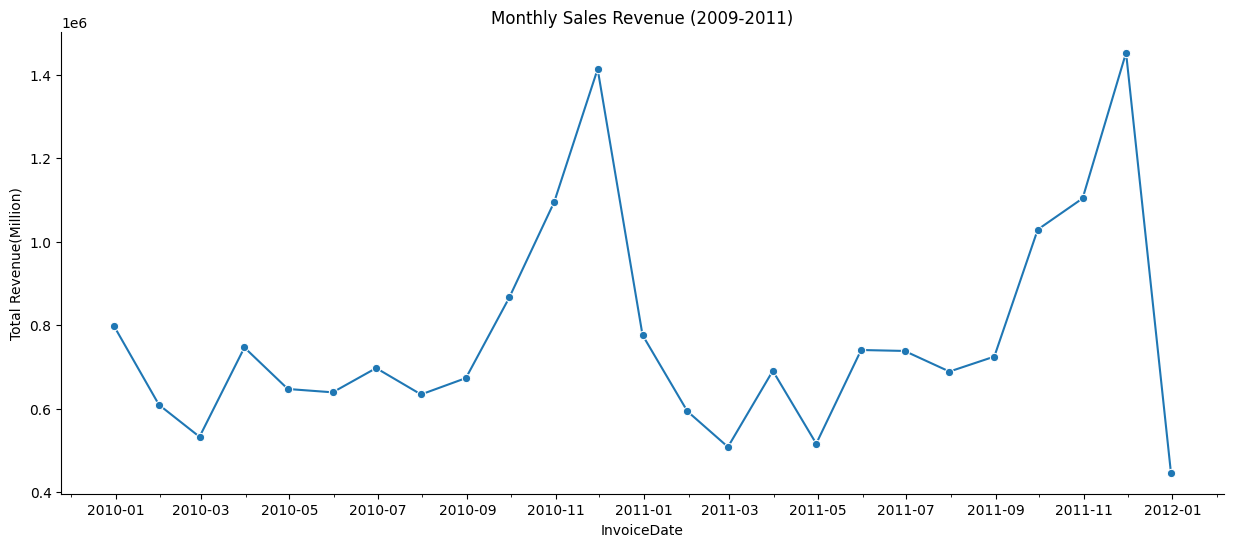

In [35]:
fig, ax = plt.subplots(figsize=(15,6))
sns.lineplot(data = monthly_sales, x='InvoiceDate', y='Total_Price', marker = 'o', ax=ax)

# Set a larger figure size for better readability

ax.set_title('Monthly Sales Revenue (2009-2011)')
ax.set_ylabel('Total Revenue(Million)')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=2))
ax.xaxis.set_minor_locator(mdates.MonthLocator())
plt.show()


### a. How is our business performing on a monthly basis?
- In both years, Our sales starts to pick up at the start of september and reach its peack at the end of November.
- We should align our restacking strategy before the peak months which is september


### b. Which countries are our top markets?

b1. Group all of our sales data by Country and sum the TotalPrice and store it in the Total_sale_country

b2. Rank the top 10 Countries with the highest total sold

b3. Create a line plot to visually show the monthly performance

1a. Group all of our sales data by Country and sum the TotalPrice and store it in the Total_sale_country


In [36]:

Total_sale_country = df_final.groupby('Country')['Total_Price'].sum().reset_index()

1b.  Rank the top 10 Countries with the highest total sold

In [37]:
top_10_df = Total_sale_country.sort_values(by ='Total_Price', ascending=False).head(10)
top_10_df

,Country,Total_Price
40,United Kingdom,16524708.83
11,EIRE,633284.16
26,Netherlands,549773.41
15,Germany,383289.00
14,France,309590.29
0,Australia,167800.01
34,Spain,97766.75
36,Switzerland,94024.59
35,Sweden,86319.14
3,Belgium,56993.17


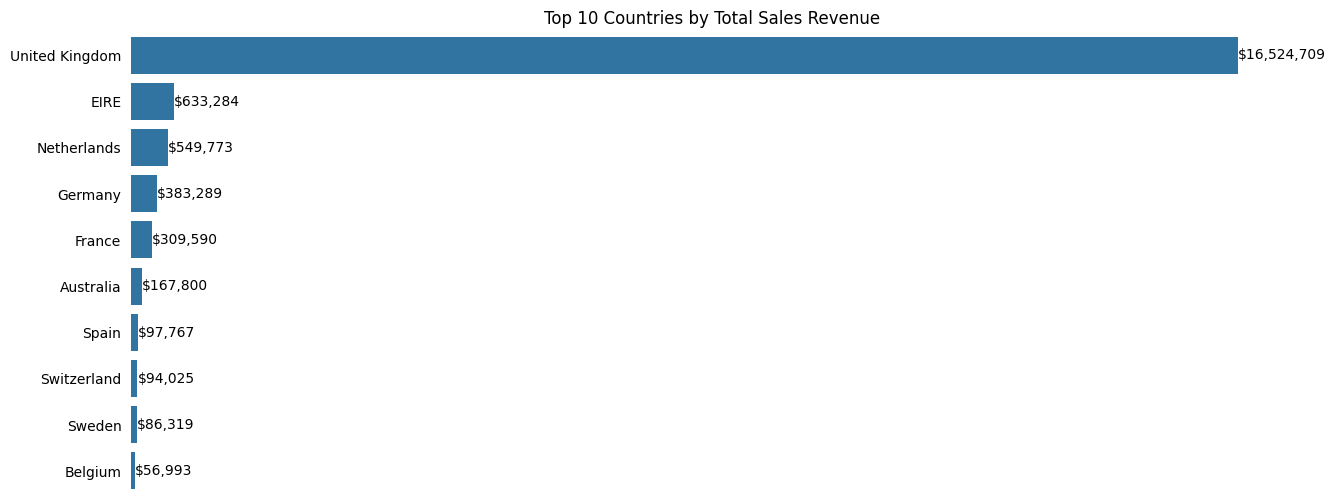

In [38]:
# 2. Create the plot
fig, ax=plt.subplots(figsize=(15,6))
sns.barplot(data=top_10_df, x='Total_Price', y='Country', ax=ax)
ax.set_title('Top 10 Countries by Total Sales Revenue')
ax.set_xlabel('')
ax.set_ylabel("")
ax.bar_label(ax.containers[0], fmt='${:,.0f}')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.tick_params(axis='x', labelbottom=False, bottom=False)
ax.tick_params(axis='y', left=False)

# What are our best-selling products?

1a. Group all of our sales data by Description and sum the Quantity. Store it in the Top_10_selling.

1b. Rank the top 10 Product with the highest Quantity sold. 

1c. Group all of our sales data by Description and count of unique invoices. 

1d. Rank the top 10 Product with the highest unique invoices.Store it in the Top_10_most popular

1e. See which top 10 selling products appears on the most popular and this will be our best-selling products.

1f. Plot the best-selling products



1a. Group all of our sales data by Description and sum the Quantity. store it in the Top_selling

In [39]:
Top_selling = df_final.groupby('Description')['Quantity'].sum().reset_index()


1b. Rank the top 10 Product with the highest Quantity sold

In [40]:
Top_selling = Top_selling.sort_values(by='Quantity', ascending = False).head(10)
Top_selling

,Description,Quantity
5275,WORLD WAR 2 GLIDERS ASSTD DESIGNS,106139
5154,WHITE HANGING HEART T-LIGHT HOLDER,94658
302,ASSORTED COLOUR BIRD ORNAMENT,80082
2435,JUMBO BAG RED RETROSPOT,77699
764,BROCADE RING PURSE,56905
3117,PACK OF 60 PINK PAISLEY CAKE CASES,56061
160,60 TEATIME FAIRY CAKE CASES,54028
4607,SMALL POPCORN HOLDER,48561
3120,PACK OF 72 RETROSPOT CAKE CASES,48156
3119,PACK OF 72 RETRO SPOT CAKE CASES,46728


In [41]:
# Most of our outliers took the most selling  products lets make another assessment by invoice made

In [42]:
most_popular= df_final.groupby('Description')['Invoice'].nunique().reset_index()
most_popular

,Description,Invoice
0,DOORMAT UNION JACK GUNS AND ROSES,60
1,3 STRIPEY MICE FELTCRAFT,129
2,4 PURPLE FLOCK DINNER CANDLES,57
3,50'S CHRISTMAS GIFT BAG LARGE,129
4,ANIMAL STICKERS,12
...,...,...
5386,ZINC T-LIGHT HOLDER STARS SMALL,274
5387,ZINC TOP 2 DOOR WOODEN SHELF,55
5388,ZINC WILLIE WINKIE CANDLE STICK,630
5389,ZINC WIRE KITCHEN ORGANISER,16


In [43]:
most_popular = most_popular.sort_values(by='Invoice', ascending = False).head(20)
most_popular

,Description,Invoice
5154,WHITE HANGING HEART T-LIGHT HOLDER,5455
3822,REGENCY CAKESTAND 3 TIER,3918
2435,JUMBO BAG RED RETROSPOT,3269
302,ASSORTED COLOUR BIRD ORNAMENT,2807
3206,PARTY BUNTING,2674
2657,LUNCH BAG BLACK SKULL.,2351
2449,JUMBO STORAGE BAG SUKI,2329
4717,STRAWBERRY CERAMIC TRINKET BOX,2310
2447,JUMBO SHOPPER VINTAGE RED PAISLEY,2192
2244,HEART OF WICKER SMALL,2151


In [44]:
1e. See which top 10 selling products appears on the most popular and this will be our best-selling products.

SyntaxError: invalid decimal literal (2850517362.py, line 1)

In [ ]:
best_selling_Products = Top_selling[Top_selling['Description'].isin(most_popular['Description'])]
best_selling_Products

1f. Plot the best-selling products

In [ ]:
fig, ax=plt.subplots(figsize=(15,6))
sns.barplot(data=best_selling_Products, x='Quantity', y='Description', ax=ax)
ax.set_title('Best_selling Products')
ax.set_xlabel('')
ax.set_ylabel("")
ax.bar_label(ax.containers[0], fmt='{:,.0f}')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.tick_params(axis='x', labelbottom=False, bottom=False)
ax.tick_params(axis='y', left=False)